In [7]:
from selective_recruitment.plotting import make_scatterplot
from selective_recruitment.scripts.script_mapwise import calc_ttest_mean
from selective_recruitment.scripts.script_roi_differences import norm_within_category # for results after normalization
import selective_recruitment.data as ss
import selective_recruitment.regress as ra
import selective_recruitment.region as sroi

import Functional_Fusion.dataset as ds


from statsmodels.stats.anova import AnovaRM  # perform F test
from scipy.stats import ttest_rel

from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [8]:
# setting working directory
base_dir = '/Volumes/Diedrichsen_data$/data/FunctionalFusion'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'

In [24]:
# get the task info
DS = ds.get_dataset_class(base_dir, "MDTB")
dir(DS)

# DS.task_info
info = DS.get_info(ses_id='ses-s2', type= "CondAll", subj="group", fields=None)
label_dict = {}
marker_dict = {}
color_dict = {}
for i in info.cond_num:
    label_dict[i] = info.cond_name.loc[info.cond_num == i].values[0]
    marker_dict[i] = 'o'
    color_dict[i] = 'b'

In [25]:
# get the summary df with observed and predicted activation within cerebellar parcels

## set params
dataset = "MDTB"
ses_id = "ses-s2"
cerebellum_roi = "HarvardOxBg"
cortex = "Icosahedron1002"
train_dataset = "MDTB"
train_ses_id = 'ses-s1'
method = "L2regression"
type = "CondHalf"
crossed = True
mname_base = f"{train_dataset}_{train_ses_id}_{cortex}_{method}"#f'Fusion_all_{cortex}_L2regression'
mname_ext = "_A6" # if you want to use the fused model, mname_ext will be fuse_id. Use "_A8" for the non-fused model
atlas_space = 'MNIAsymBg2'
space = 'MNI152NLin6Asym'
# # get predicted and observed within region of interest

# D = ss.get_summary_conn(dataset = dataset,
#                     ses_id = ses_id,
#                     subj = None,
#                     atlas_space = atlas_space,
#                     space = space,
#                     cerebellum_roi = cerebellum_roi,
#                     cerebellum_roi_selected = None,
#                     cortex_roi = cortex,
#                     type = type,
#                     add_rest = True,
#                     mname_base = mname_base,
#                     mname_ext = mname_ext,
#                     crossed = True)

# # apply regression to get residuals
# # this second regression is implemented because direct comparison of observed and 
# # predicted activation is not possible due to different scaling
# D = ra.roi_regress(D, fit_intercept=True)

# # # # save the df
# D.to_csv(wkdir + f'/mdtb_ROI_bg_{type}_{train_dataset}_{train_ses_id}_{method}{mname_ext}_reg.tsv', sep='\t')
D = pd.read_csv(wkdir + f'/mdtb_ROI_bg_{type}_{train_dataset}_{train_ses_id}_{method}{mname_ext}_reg.tsv', sep='\t')

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  8.3437 30.0000 690.0000 0.0000



/Users/lshahsha/Documents/GitHub/selective_recruitment/plotting.py:87: FutureWarning: The provided callable <function mean at 0x1035034c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = grouped.agg(agg_kw)
/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/statsmodels/stats/anova.py:508: FutureWarning: The provided callable <function mean at 0x1035034c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.data = (self.data


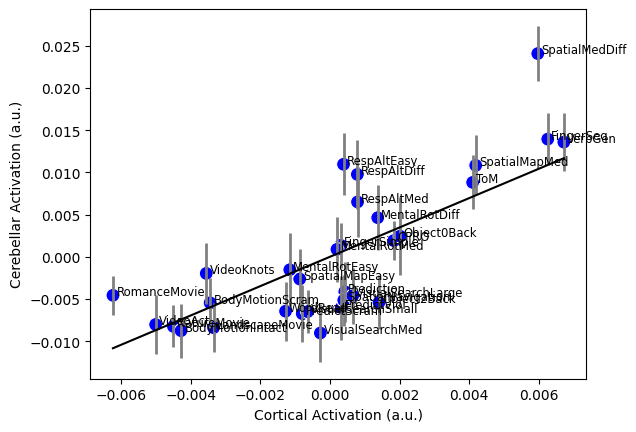

In [26]:
# get the dataframe with the selected region
selected_roi = "PutamenL"
df = D.loc[(D.roi_name == selected_roi) & (D.cond_name != 'rest')]
make_scatterplot(df, split='cond_num',
                labels=label_dict,
                markers=marker_dict,
                colors=color_dict)
# plt.xlabel("predicted cerebellar activation")
# plt.savefig(f"mdtb_bg_{selected_roi}_scatter_{mname_base}{mname_ext}.pdf")
print(AnovaRM(data=df[df.cond_name != 'rest'], depvar='res',subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())

In [ ]:
df